In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Specify the path to CSV file
csv_file_path = 'satcat.csv'

# Read the CSV file into a DataFrame
try:
    debris_data = pd.read_csv(csv_file_path)
    print("CSV file successfully loaded.")
except Exception as e:
    print(f"Error loading CSV file: {e}")
print(debris_data)

CSV file successfully loaded.
              OBJECT_NAME  OBJECT_ID  NORAD_CAT_ID OBJECT_TYPE  \
0                SL-1 R/B  1957-001A             1         R/B   
1               SPUTNIK 1  1957-001B             2         PAY   
2               SPUTNIK 2  1957-002A             3         PAY   
3              EXPLORER 1  1958-001A             4         PAY   
4              VANGUARD 1  1958-002B             5         PAY   
...                   ...        ...           ...         ...   
61384  SHIJIAN-19 (SJ-19)  2024-177A         61444         PAY   
61385           CZ-2D R/B  2024-177B         61445         R/B   
61386        VANGUARD DEB  1959-001E         61446         DEB   
61387       CREW DRAGON 9  2024-178A         61447         PAY   
61388            OBJECT A  2024-179A         61448         PAY   

      OPS_STATUS_CODE OWNER LAUNCH_DATE LAUNCH_SITE  DECAY_DATE  PERIOD  \
0                   D   CIS  1957-10-04       TYMSC  1957-12-01   96.19   
1                   D   CIS

In [20]:
#compute semiaxis and eccentricity from apogee and perigee
debris_data['SEMIAXIS'] = 0.5*(debris_data['APOGEE']+debris_data['PERIGEE']+2*6378)
debris_data['ECCENTRICITY'] = (debris_data['APOGEE']-debris_data['PERIGEE'])/(debris_data['APOGEE']+debris_data['PERIGEE']+2*6378)

In [21]:
#ensure eccentricity is computed as positive
debris_data=debris_data[debris_data['ECCENTRICITY']>0]
print(debris_data)

              OBJECT_NAME  OBJECT_ID  NORAD_CAT_ID OBJECT_TYPE  \
0                SL-1 R/B  1957-001A             1         R/B   
1               SPUTNIK 1  1957-001B             2         PAY   
2               SPUTNIK 2  1957-002A             3         PAY   
3              EXPLORER 1  1958-001A             4         PAY   
4              VANGUARD 1  1958-002B             5         PAY   
...                   ...        ...           ...         ...   
61384  SHIJIAN-19 (SJ-19)  2024-177A         61444         PAY   
61385           CZ-2D R/B  2024-177B         61445         R/B   
61386        VANGUARD DEB  1959-001E         61446         DEB   
61387       CREW DRAGON 9  2024-178A         61447         PAY   
61388            OBJECT A  2024-179A         61448         PAY   

      OPS_STATUS_CODE OWNER LAUNCH_DATE LAUNCH_SITE  DECAY_DATE  PERIOD  \
0                   D   CIS  1957-10-04       TYMSC  1957-12-01   96.19   
1                   D   CIS  1957-10-04       TYMSC  1958

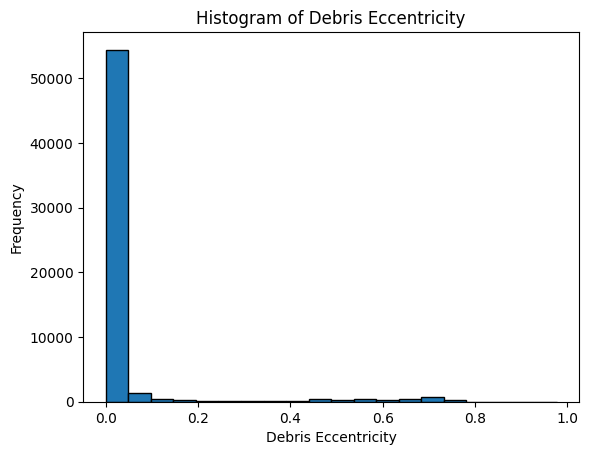

In [22]:
# Select a column (e.g. eccentricity)
debris_ecc = debris_data['ECCENTRICITY']

# Plot an histogram
plt.hist(debris_ecc, bins=20, edgecolor='black')
plt.xlabel('Debris Eccentricity')
plt.ylabel('Frequency')
plt.title('Histogram of Debris Eccentricity')
plt.show()

In [23]:
#Select current debris data
today_data = debris_data[debris_data['DECAY_DATE'].isna()]
print(today_data)

              OBJECT_NAME  OBJECT_ID  NORAD_CAT_ID OBJECT_TYPE  \
4              VANGUARD 1  1958-002B             5         PAY   
10             VANGUARD 2  1959-001A            11         PAY   
11           VANGUARD R/B  1959-001B            12         R/B   
15           VANGUARD R/B  1958-002A            16         R/B   
19             VANGUARD 3  1959-007A            20         PAY   
...                   ...        ...           ...         ...   
61384  SHIJIAN-19 (SJ-19)  2024-177A         61444         PAY   
61385           CZ-2D R/B  2024-177B         61445         R/B   
61386        VANGUARD DEB  1959-001E         61446         DEB   
61387       CREW DRAGON 9  2024-178A         61447         PAY   
61388            OBJECT A  2024-179A         61448         PAY   

      OPS_STATUS_CODE OWNER LAUNCH_DATE LAUNCH_SITE DECAY_DATE  PERIOD  \
4                 NaN    US  1958-03-17       AFETR        NaN  132.64   
10                NaN    US  1959-02-17       AFETR        

In [27]:
#Data Retrieval for Josep Rubí (alltime data to derive debris' distribution in space)
pep_data = debris_data[['OBJECT_NAME','SEMIAXIS','ECCENTRICITY','INCLINATION']]
pep_data.to_csv('alltime_data.csv', index=True)

#Data Retrieval for José Javier Ortega (active debris data for unity simulation)
joseja_unk = today_data[today_data['OBJECT_TYPE']=='UNK']
joseja_unk = joseja_unk[['OBJECT_NAME','SEMIAXIS','ECCENTRICITY','INCLINATION']]
joseja_unk.to_csv('unknown_today_data.csv', index=True)

joseja_pay = today_data[today_data['OBJECT_TYPE']=='PAY']
joseja_pay = joseja_pay[['OBJECT_NAME','SEMIAXIS','ECCENTRICITY','INCLINATION']]
joseja_pay.to_csv('payload_today_data.csv', index=True)

joseja_rb = today_data[today_data['OBJECT_TYPE']=='R/B']
joseja_rb = joseja_rb[['OBJECT_NAME','SEMIAXIS','ECCENTRICITY','INCLINATION']]
joseja_rb.to_csv('rocketbody_today_data.csv', index=True)

joseja_deb = today_data[today_data['OBJECT_TYPE']=='DEB']
joseja_deb = joseja_deb[['OBJECT_NAME','SEMIAXIS','ECCENTRICITY','INCLINATION']]
joseja_deb.to_csv('fragments_today_data.csv', index=True)

In [49]:
##Future Predictions##

#Obtain Launch Year and Decay Rate
debris_data['LAUNCH_YEAR'] = debris_data['LAUNCH_DATE'].str.split('-').apply(lambda x: int(x[0]))

debris_data['DECAY_DATE_SPLIT'] = debris_data['DECAY_DATE'].str.split('-')
debris_data['DECAY_DATE_SPLIT'] = debris_data['DECAY_DATE_SPLIT'].apply(lambda x: x if isinstance(x, list) else ['2024'])
debris_data['DECAY_YEAR'] = debris_data['DECAY_DATE_SPLIT'].apply(lambda x: int(x[0]))

min_year = int(min(debris_data['LAUNCH_YEAR']))
max_year = 2024

# Create a list of integers from min_year to max_year (inclusive)
year_list = list(range(min_year, max_year + 1))



In [50]:
#Obtaining Historical data, debris count over the years
# Create an empty DataFrame
counts_years_frame = pd.DataFrame(columns=['YEAR', 'DEBRIS_COUNT'])

i=0
#For every year in the list
for year in year_list:
    
    #select and count active objects
    sel_objects = debris_data[(debris_data['LAUNCH_YEAR'] <= year) & (debris_data['DECAY_YEAR'] >= year)]
    counts = len(sel_objects)

    new_row = {'YEAR': year, 'DEBRIS_COUNT': counts}
    counts_years_frame.loc[i] = new_row
    i+=1
print(counts_years_frame)

    YEAR  DEBRIS_COUNT
0   1957             3
1   1958            11
2   1959            26
3   1960            62
4   1961           448
..   ...           ...
63  2020         24637
64  2021         26212
65  2022         29161
66  2023         29768
67  2024         30309

[68 rows x 2 columns]


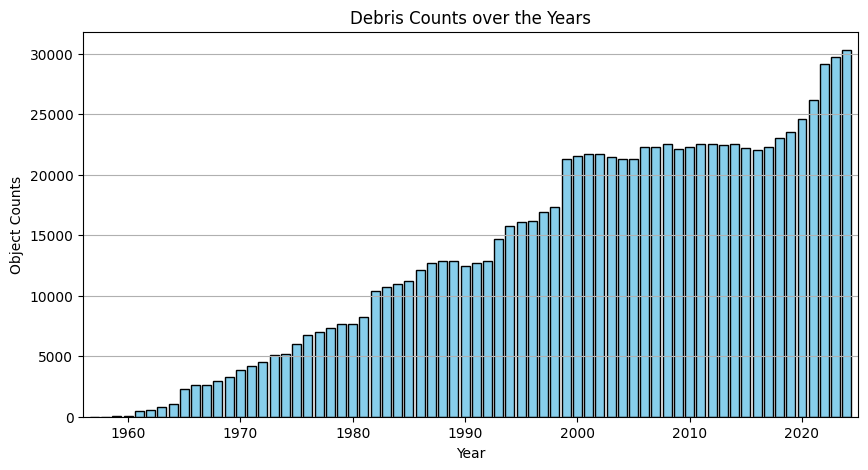

In [55]:
# Create a histogram for DEBRIS_COUNT
plt.figure(figsize=(10, 5))
plt.bar(counts_years_frame['YEAR'], counts_years_frame['DEBRIS_COUNT'], color='skyblue', edgecolor='black')
plt.title('Debris Counts over the Years')
plt.xlabel('Year')
plt.ylabel('Object Counts')

# Set fewer x-axis labels
plt.xticks(ticks=[1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030])  # Display only these years on the x-axis
plt.xlim(counts_years_frame['YEAR'].min() - 1, counts_years_frame['YEAR'].max() + 1)  # Optional: extend limits slightly for better aesthetics

# Show the grid only on the y-axis
plt.grid(axis='y')

# Show the plot
plt.show()


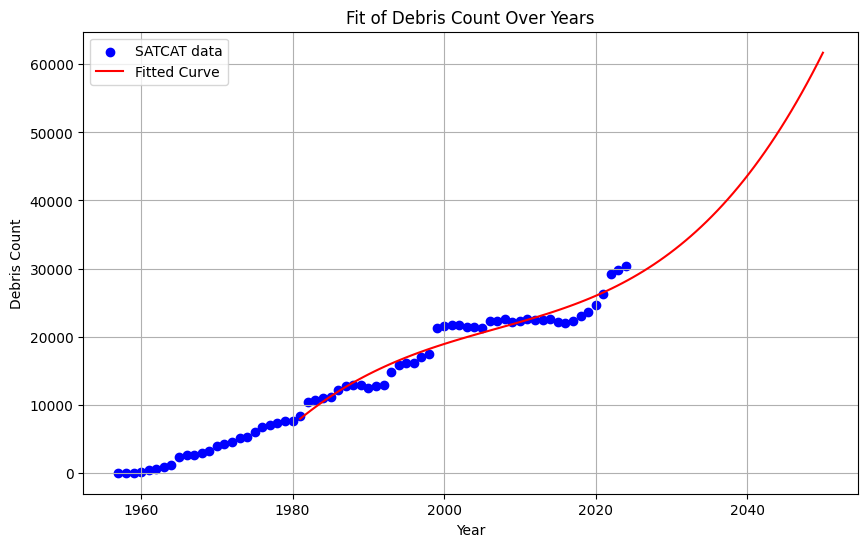

Fitting parameters: [ 5.81270788e+09 -1.28504324e+07  1.05498307e+04 -3.81843960e+00
  5.14773107e-04]


In [69]:
# Prepare the data for fitting
x_data = counts_years_frame[['YEAR']].to_numpy().flatten()  # Independent variable (flattened)
y_data = counts_years_frame['DEBRIS_COUNT'].to_numpy()  # Dependent variable

# Create the polynomial model for fitting
def my_fit(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

n=len(y_data)
# Fit the data to the polynomial function
params, covariance = curve_fit(my_fit, x_data[n-44:n], y_data[n-44:n])

# Generate x values for plotting the fitted function
x_fit = np.linspace(x_data[n-44], 2050, 100)
y_fit = my_fit(x_fit, *params)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='SATCAT data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.title('Fit of Debris Count Over Years')
plt.xlabel('Year')
plt.ylabel('Debris Count')
plt.legend()
plt.grid()
plt.show()

# Print the fitting parameters
print(f'Fitting parameters: {params}')


In [89]:
#predict the data from the regression model
x_pred = np.arange(2024, 2050, 1)
y_pred = my_fit(x_pred, *params)

#add some gaussian noise to the predicted data
in_noise = y_data[-1] - y_pred[0]

def add_gaussian_noise(data, mean, std_dev, in_noise):
    accum_noise = in_noise

    noise = np.random.normal(mean, std_dev, size=data.shape)  # Generate Gaussian noise
    noisy_data = data
    for i in range(len(data)):
        accum_noise+=noise[i]-in_noise/len(data)
        noisy_data[i] = data[i] + accum_noise  # Add noise to the original data

    return noisy_data

y_noisy_pred = add_gaussian_noise(y_pred, mean=0, std_dev=500, in_noise=in_noise)



In [91]:
#Collect final predictions in a csv
predictions_df = pd.DataFrame({'YEAR_PRED': x_pred, 'PREDICTED_DEBRIS_COUNT': y_noisy_pred})

# Save to CSV
csv_filename = 'predicted_debris_count2.csv'
predictions_df.to_csv(csv_filename, index=False)

C:\Users\Asus\AppData\Local\Temp\ipykernel_45096\391814317.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  binned_data['DEBRIS_COUNT'][i] = binned_data['DEBRIS_COUNT'][i]/bin_size
C:\Users\Asus\AppData\Local\Temp\ipykernel_45096\3918143

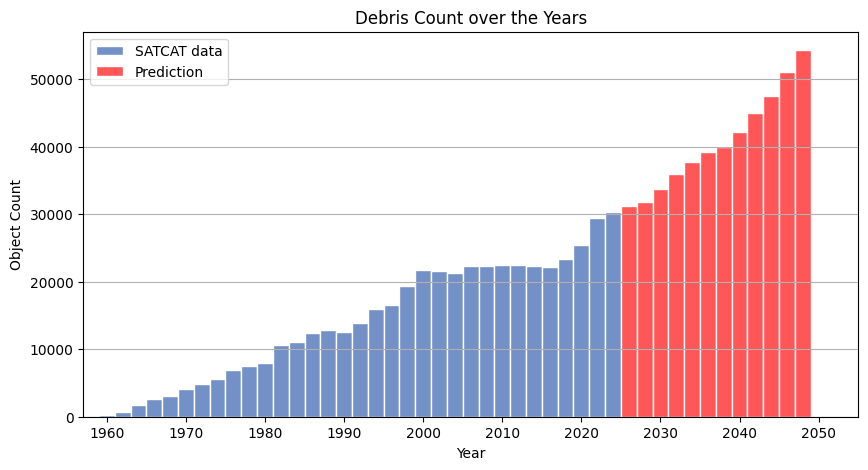

In [90]:
# Plotting the final histogram
bin_size = 2  # Choice of bin size (e.g., 2-year bins)

# Group the actual debris count data into 2-year bins
counts_years_frame['YEAR_BIN'] = (counts_years_frame['YEAR'] // bin_size) * bin_size

# Group the predicted data
pred_df = pd.DataFrame({
    'YEAR': x_pred,
    'DEBRIS_COUNT': y_noisy_pred
})
pred_df['YEAR_BIN'] = (pred_df['YEAR'] // bin_size) * bin_size

# Sum the debris count for each bin
binned_data = counts_years_frame.groupby('YEAR_BIN')['DEBRIS_COUNT'].sum().reset_index()
binned_pred = pred_df.groupby('YEAR_BIN')['DEBRIS_COUNT'].sum().reset_index()
for i in range(len(binned_data)):
    if i<len(binned_data)-1:
        binned_data['DEBRIS_COUNT'][i] = binned_data['DEBRIS_COUNT'][i]/bin_size

for i in range(len(binned_pred)):
    if i<len(binned_pred):
        binned_pred['DEBRIS_COUNT'][i] = binned_pred['DEBRIS_COUNT'][i]/bin_size

# Prepare the plot
plt.figure(figsize=(10, 5))

# Plot actual debris count data
plt.bar(binned_data['YEAR_BIN'], binned_data['DEBRIS_COUNT'], color='#7391C7', edgecolor='white', label='SATCAT data', width=bin_size)

# Plot predicted debris count data
plt.bar(binned_pred['YEAR_BIN'][1:], binned_pred['DEBRIS_COUNT'][1:], color='#FF5757', edgecolor='white', label='Prediction', width=bin_size)

# Formatting the plot
plt.title('Debris Count over the Years')
plt.xlabel('Year')
plt.xlim(1957, 2055)
plt.xticks(ticks=np.arange(1960, 2060, 10))  # Adjusting the ticks to reflect the bins
plt.ylabel('Object Count')
plt.grid(axis='y')

# Show legend and plot
plt.legend()
plt.show()
